# Hand Written Digit Prediction

### Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading Data

In [8]:
from sklearn.datasets import load_digits

### Describing Data

In [9]:
df = load_digits()

AttributeError: module 'matplotlib.cm' has no attribute 'grey_r'

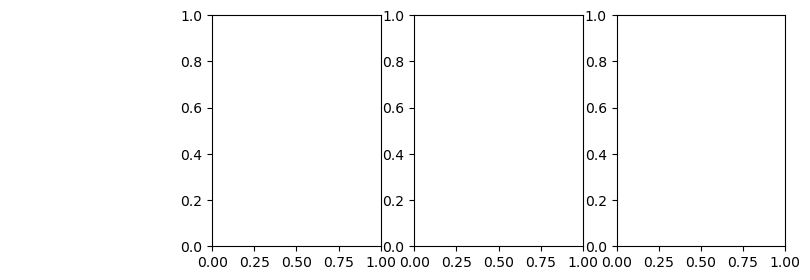

In [10]:
_,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, lable in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.grey_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Getting shape of images

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
len(df.images)

1797

In [15]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

### Calculating Min Max of Data

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data = data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

### Training model

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier()

### Predicting y variable

In [31]:
y_pred = rf.predict(X_test)

In [32]:
y_pred

array([8, 1, 3, 1, 1, 8, 9, 4, 6, 2, 7, 5, 9, 2, 3, 2, 0, 8, 5, 9, 8, 0,
       8, 3, 3, 4, 8, 1, 4, 5, 0, 8, 7, 4, 6, 1, 6, 5, 9, 7, 5, 1, 0, 2,
       3, 3, 8, 0, 2, 2, 2, 5, 3, 1, 5, 7, 8, 7, 4, 9, 4, 8, 4, 0, 4, 9,
       7, 9, 1, 1, 3, 9, 1, 8, 1, 5, 7, 1, 0, 8, 2, 9, 7, 8, 6, 5, 1, 5,
       7, 2, 3, 5, 9, 3, 7, 0, 5, 1, 2, 7, 1, 5, 5, 3, 4, 1, 8, 2, 7, 3,
       7, 0, 7, 6, 1, 9, 4, 1, 7, 1, 5, 9, 3, 5, 1, 1, 5, 4, 5, 6, 2, 0,
       0, 7, 0, 2, 2, 2, 6, 2, 5, 0, 1, 1, 6, 4, 9, 7, 1, 1, 8, 1, 0, 8,
       4, 3, 0, 3, 7, 5, 5, 6, 2, 2, 6, 9, 7, 5, 2, 4, 3, 9, 7, 7, 4, 9,
       8, 5, 2, 6, 9, 6, 9, 1, 7, 7, 2, 8, 4, 8, 8, 6, 2, 9, 5, 2, 4, 0,
       5, 9, 1, 3, 6, 4, 3, 1, 6, 1, 7, 7, 0, 0, 1, 0, 2, 9, 3, 6, 6, 5,
       0, 2, 3, 2, 1, 8, 4, 6, 1, 7, 0, 0, 3, 8, 2, 4, 1, 0, 4, 6, 4, 6,
       7, 9, 7, 4, 7, 2, 3, 3, 0, 0, 6, 6, 0, 5, 7, 8, 1, 2, 7, 2, 5, 2,
       7, 8, 5, 3, 2, 9, 3, 3, 0, 4, 3, 2, 3, 9, 2, 3, 9, 2, 6, 6, 8, 2,
       4, 8, 3, 9, 9, 3, 6, 6, 2, 4, 6, 8, 4, 1, 9,

### Predicting Model Accuracy

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test, y_pred)

array([[46,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 65,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 49,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 66,  1,  0],
       [ 0,  4,  0,  1,  0,  1,  0,  0, 46,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 49]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.93      1.00      0.96        50
           2       1.00      1.00      1.00        65
           3       0.96      0.94      0.95        52
           4       0.98      1.00      0.99        51
           5       0.96      0.96      0.96        54
           6       1.00      0.98      0.99        51
           7       1.00      0.99      0.99        67
           8       0.92      0.88      0.90        52
           9       0.98      0.96      0.97        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

